# Task Name: Iris Flowers Classification ML Project

###### This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Yash Sharma

Github: https://github.com/yash2arma/LetsGrowMore_Internship

### Step-1 Data Preprocessing

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Number of entries
df.size

750

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#check missing values in the dataset
df.isnull().values.any()

False

In [7]:
#find the name of species
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Step-2 Data Visualization

Text(0, 0.5, 'Y Axis')

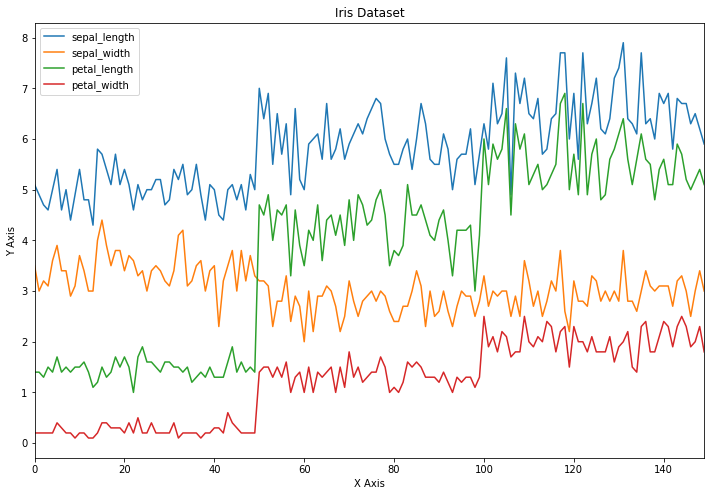

In [8]:
#line plot
ax = df.plot(figsize=(12,8), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

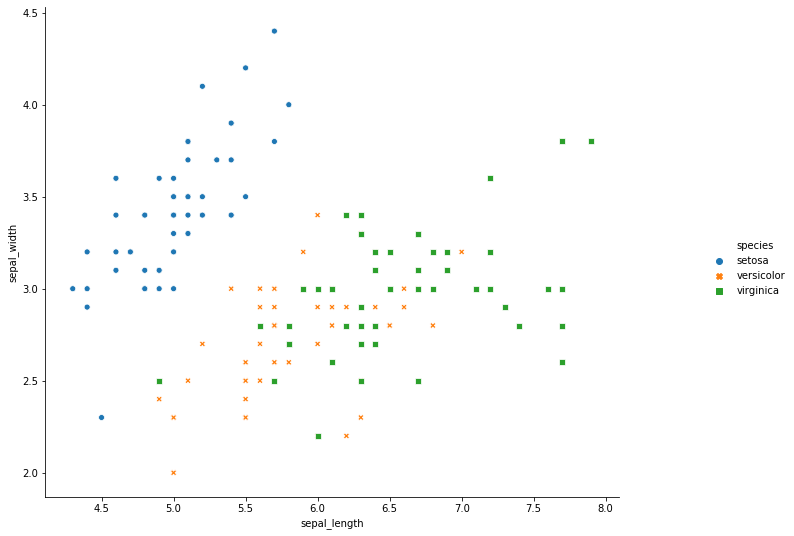

In [9]:
#Scatter plot
g=sns.relplot(x='sepal_length',y='sepal_width',data=df,hue='species',style='species')
g.fig.set_size_inches(12,8)
plt.show()

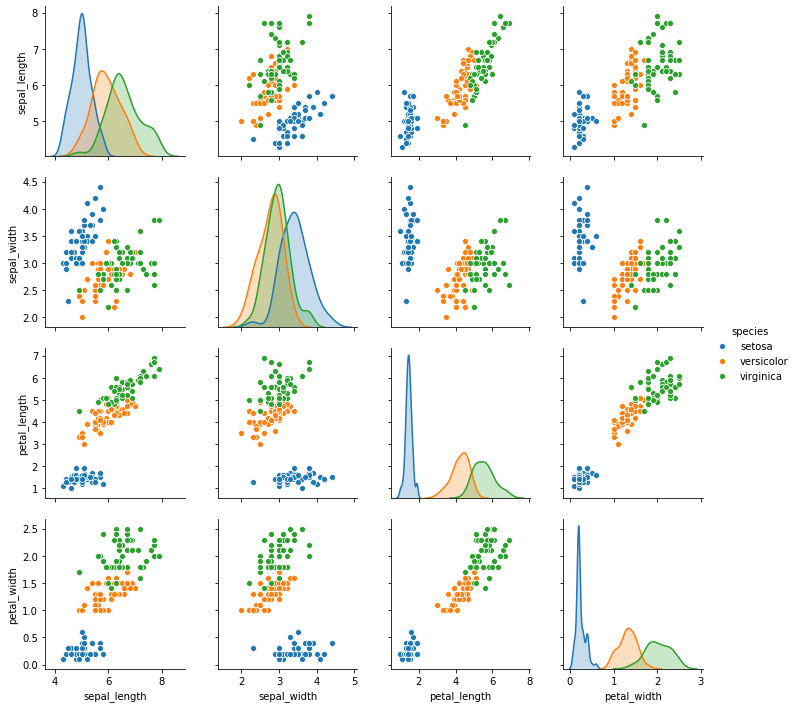

In [10]:
#visualize correlation among species
sns.pairplot(df,hue='species')
plt.show()

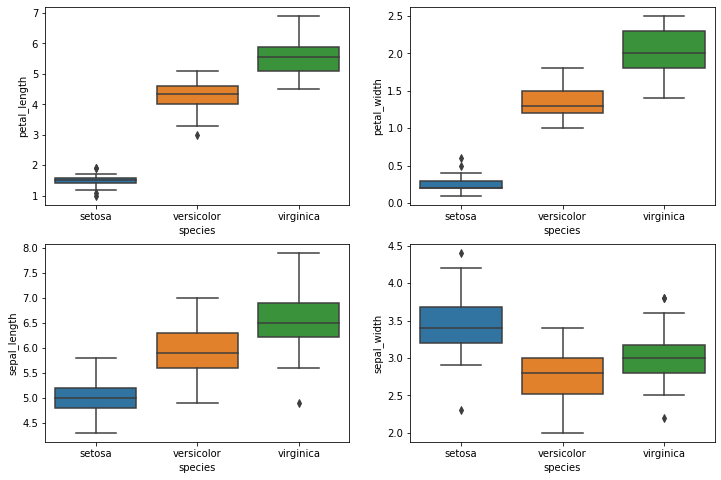

In [11]:
#compare using boxplot
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.show()

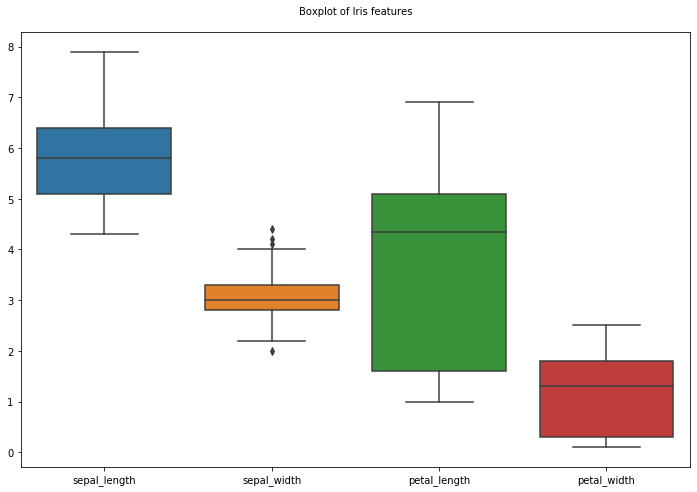

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df).set_title("Boxplot of Iris features\n",size=10)
plt.show()

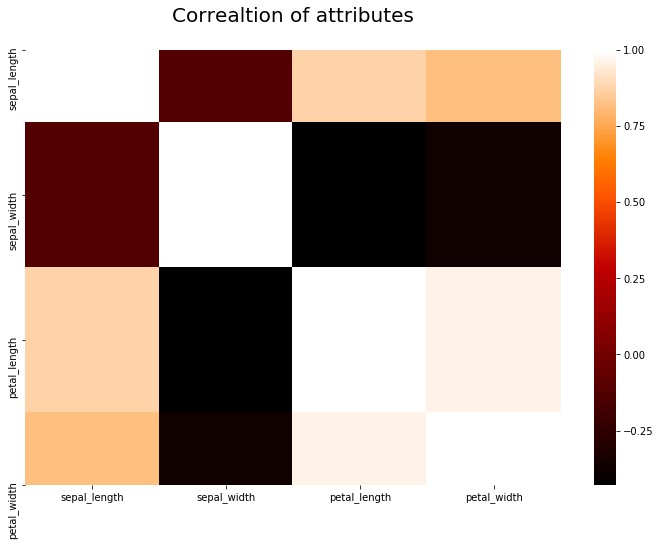

In [13]:
#Find correlation among attribures
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=20)
plt.show()

### Step-3 Fitting the model into different ml algorithm and check prediction accuracy

In [14]:
#define variables
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
#import different ml models
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [16]:
#import performance metrices
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Use different models and fit the data

In [18]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Random Forest\n",cm)
print("Accuracy of Random Forest = ",acc)
print("Precision of Random Forest = ",prec)
print("Recall of Random Forest = ",recall)
print("f1 score of Random Forest = ",f1)

Confusion matrix of Random Forest
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy of Random Forest =  0.9666666666666667
Precision of Random Forest =  0.9666666666666667
Recall of Random Forest =  0.9666666666666667
f1 score of Random Forest =  0.9666666666666667


In [19]:
#Logistic Regression
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Logistic Regression\n",cm)
print("\nAccuracy of Logistic Regression = ",acc)
print("\nPrecision of Logistic Regression = ",prec)
print("\nRecall of Logistic Regression = ",recall)
print("\nf1 score of Logistic Regression = ",f1)

Confusion matrix of Logistic Regression
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of Logistic Regression =  1.0

Precision of Logistic Regression =  1.0

Recall of Logistic Regression =  1.0

f1 score of Logistic Regression =  1.0


In [20]:
#K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


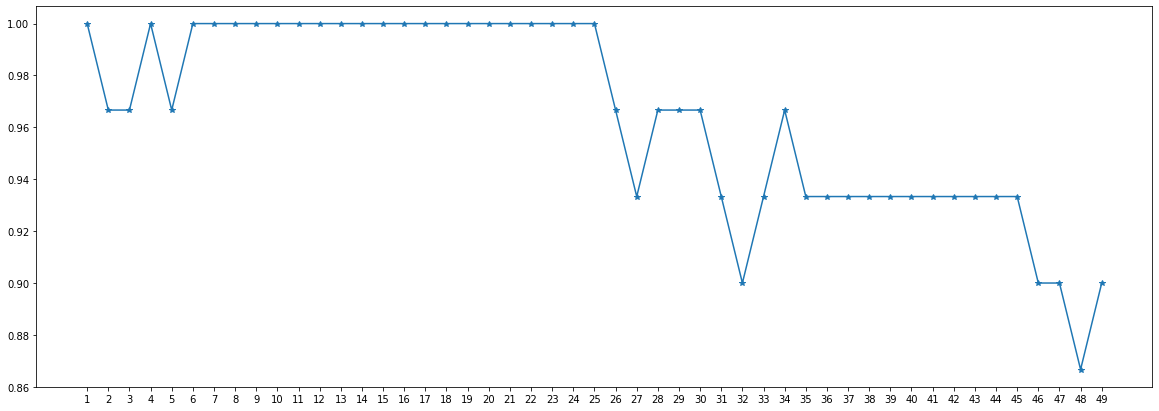

In [21]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()


In [22]:
#Gaussian Naive Bayes
gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred = gauss.predict(X_test)
acc_gauss = round(accuracy_score(y_test,y_pred)*100,2)
gauss_acc = round(gauss.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


In [23]:
#Linear Support Vector Classifier
lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)
acc_lsvc = round(accuracy_score(y_test,y_pred)*100,2)
lsvc_acc = round(lsvc.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
zacc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


In [27]:
#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


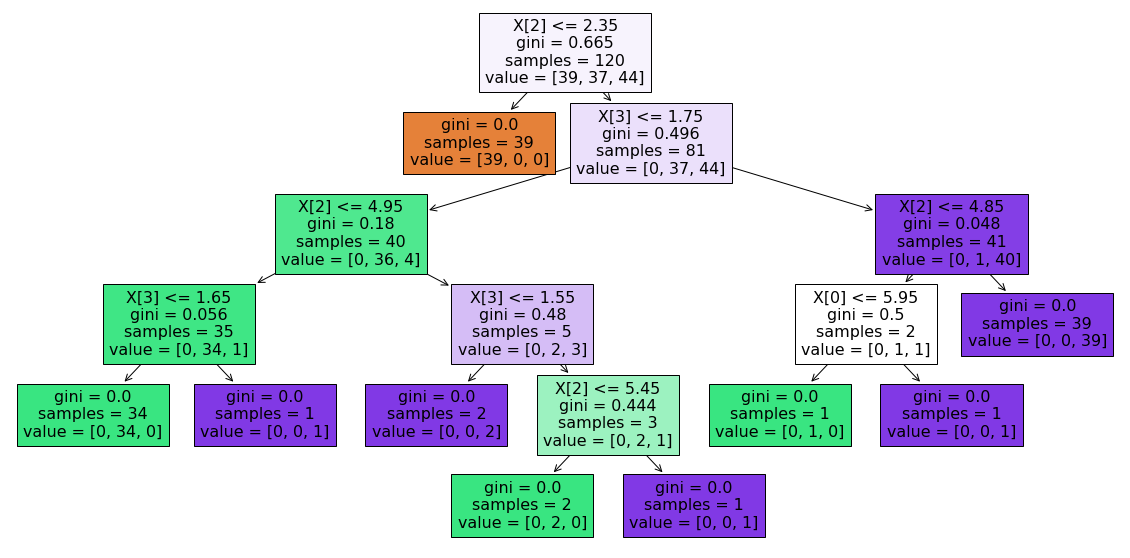

In [28]:
#plot Decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

### Step-4 Evaluating Model Performance

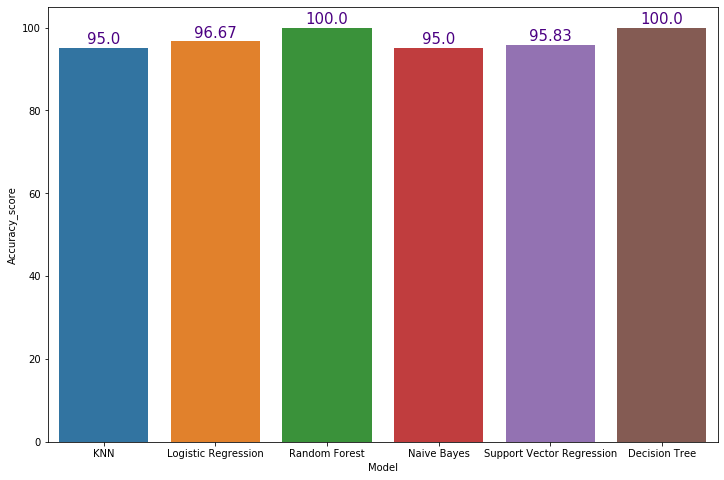

In [29]:
res = pd.DataFrame(
    {
        'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Regression','Decision Tree'],
     'Score':[acc_knn,acc_lg,acc_rf,acc_gauss,acc_lsvc,acc_dt],
     'Accuracy_score':[knn_acc,lg_acc,rf_acc,gauss_acc,lsvc_acc,dt_acc]
    }
)


res
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Model',y='Accuracy_score',data=res)
labels = (res['Accuracy_score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',size=15,color='indigo')

###### As you can see output is best predicted by random forest or a decision tree classifier. In the dataset, two species have many similar features and differ by some minute difference in a combination of features,which cannot be separated by any form of regression. Hence, it can be classified better by a non-linear classifier like a decision tree or an array of decision trees (known as random forest).